# NLP to find ML trending topics
This project seeks to use NLP methods to identify the most recent topics in ML with data from the NIPS conference. 

In [1]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers = pd.read_csv('papers.csv')

# Print out the first rows of papers
papers.head()
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


<Axes: xlabel='year'>

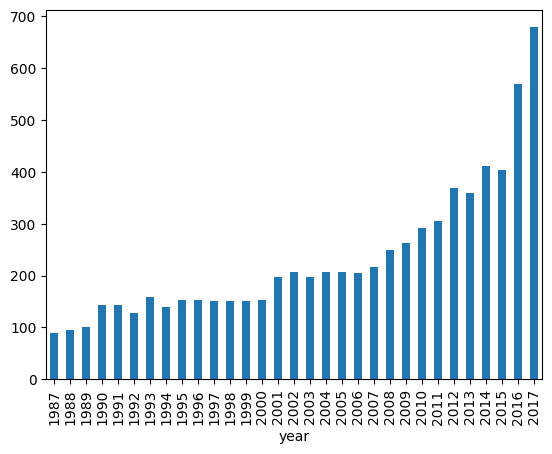

In [2]:
# Remove the columns
papers=papers.drop(['id','event_type','pdf_name'],axis=1)

# Print out the first rows of papers
papers.head()

# Group the papers by year
groups = papers.groupby(['year'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar')

In [4]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].str.lower()

# Print the processed titles of the first rows 
print(papers['title_processed'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object
0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles, cross validation, an...
Name: title_processed, dtype: object


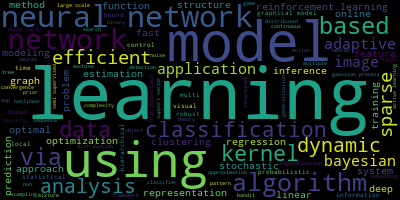

In [8]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

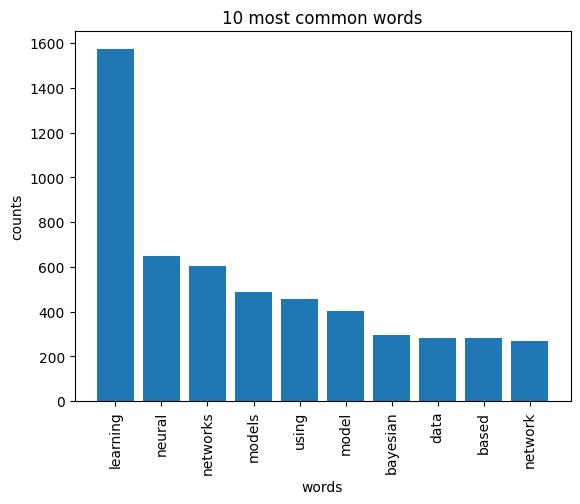

In [19]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data,count_vectorizer)

In [21]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning supervised methods semi using non stochastic natural sparse continuous

Topic #1:
learning gaussian models regression process multi data model vector linear

Topic #2:
learning algorithms active robust linear reinforcement feature bounds based convergence

Topic #3:
inference models bayesian variational learning efficient estimation using latent approximate

Topic #4:
recognition learning using visual model object propagation belief human memory

Topic #5:
large optimal scale random classification multi image optimization learning sparse

Topic #6:
functions analysis learning submodular maximum neurons online independent maximization bandits

Topic #7:
neural networks learning network recurrent deep model time training control

Topic #8:
learning structure optimization based search models low rank gradient causal

Topic #9:
clustering matrix model learning analysis models adaptation using risk minimization
